# 微分と積分の関係を理解する

今までの私の微分・積分の学習は「下から積み上げる」スタイルの勉強でした。おそらくこれはもっとも一般的なアプローチでしょう。ですが私は「全体の中の部分」という視点が大切なので、今回は「上から掘り下げる」スタイルの学習アプローチで微分・積分を理解してみようとおもいます。

## 微分と積分が「逆の変換」だという直感を得よう！

下の３つのグラフは微積分の応用の典型例のひとつである「物体の加速度運動」を表しています。具体的には「スピードがどんどん上がっていくおもちゃの自動車」を床に置いて、ストップウォッチとメジャーでそれぞれ時間（何秒？）と距離（何メートル）を測った、という状況をイメージします。

グラフが３つあるのは、上から「位置と時間の関係」、「速度と時間の関係」、そして「加速度と時間の関係」を表すグラフに分けているからです。つまり「物体の加速度運動」というデカい言葉を３つに分解しているのです。

ちょっと圧倒されるかもしれませんが、少しずつ分解しながら理解すれば、２回目のこの文章を読むと理解できますので安心を。

ところで３つのグラフは全て✖軸が「時間（Time）」なので、そこだけはすでに単純になっています。

（「距離」は「位置」という言葉の方が私はしっくりくるので「位置」を使います。）

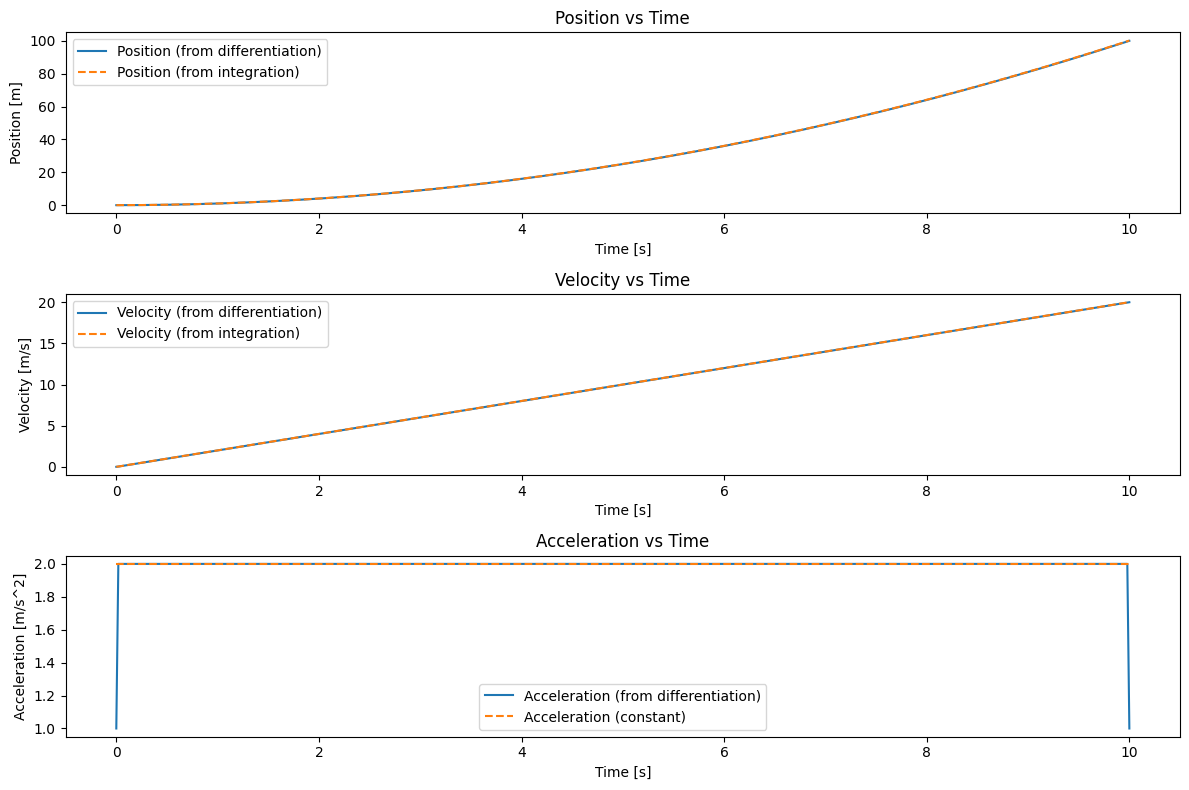

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 時間配列の定義
t = np.linspace(0, 10, 1000)  # 0秒から10秒までの時間
dt = t[1] - t[0]  # 時間ステップ

# 加速度の定義（一定値）
a_const = 2  # 加速度 [m/s^2]

# 位置の関数（抽象化された形）
def position(t):
    return 0.5 * a_const * t**2  # s(t) = 0.5 * a * t^2

# 微分の関数（一般化）
def differentiate(f, t):
    df_dt = np.gradient(f, t)
    return df_dt

# 積分の関数（一般化）
def integrate(f, t, initial=0):
    dt = t[1] - t[0]
    F = np.cumsum(f) * dt + initial
    return F

# 位置の計算
s = position(t)

# 速度と加速度の微分による計算
v = differentiate(s, t)  # 速度 v(t) = ds/dt
a = differentiate(v, t)  # 加速度 a(t) = dv/dt

# 加速度から速度と位置を積分によって計算
v_int = integrate(a, t, initial=0)  # 初期速度 v(0) = 0
s_int = integrate(v_int, t, initial=0)  # 初期位置 s(0) = 0

# グラフのプロット
plt.figure(figsize=(12, 8))

# 位置のグラフ
plt.subplot(3, 1, 1)
plt.plot(t, s, label='Position (from differentiation)')
plt.plot(t, s_int, '--', label='Position (from integration)')
plt.title('Position vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend()

# 速度のグラフ
plt.subplot(3, 1, 2)
plt.plot(t, v, label='Velocity (from differentiation)')
plt.plot(t, v_int, '--', label='Velocity (from integration)')
plt.title('Velocity vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()

# 加速度のグラフ
plt.subplot(3, 1, 3)
plt.plot(t, a, label='Acceleration (from differentiation)')
plt.plot(t, [a_const]*len(t), '--', label='Acceleration (constant)')
plt.title('Acceleration vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s^2]')
plt.legend()

plt.tight_layout()
plt.show()



この段階では、３つのグラフは以下のように理解しておきます

|グラフ| 直観的な理解|
| ----| ---- |
| 上段のグラフ（位置） | おもちゃの自動車を床に置いてスタート！すると、２秒後には５メートルぐらいの位置にあります。４秒後には20メートルぐらいまで進み、10秒後には100メートルぐらいの場所にあります。明らかにグングンスピードを上げていったので2秒で5メートルぐらいだったのに、その5倍の10秒後には25メートルではなく100メートル近くになっているので「加速度運動」したことが分かります。グラフが直線ではなく右上がりの放物曲線なので、そのことからも加速したことが分かります|
| 中断のグラフ（速さ） |　おもちゃにはスピードメーターと、それを写すカメラが付いていて、１秒の時、２秒の時、３秒の時とそれぞれの時点でのスピード（速さとも言う）を写真にしていたとします。その時々のスピードをグラフの点として描き、その点を結んだら「右上がりの直線」になりました。これはスピードがどんどん速くなったことを示しています。速さは増えたけど、その「増え方」は一定の割合だったことも分かります。 |
| 下段のグラフ（加速度） | これはおもちゃのアクセルをある程度踏み込んだままの状態で、その踏み込み具合そのものは「一定」だたことを示しています。もし踏み込み具合をどんどん増やしていたらグラフの線は右上に向かって傾いていたでしょう。しかし、実際は直線は「2のあたりで寝ています」。つまり「加速度は一定に保った」状態を表しています。|

これら３つのグラフには以下のように関係があります。

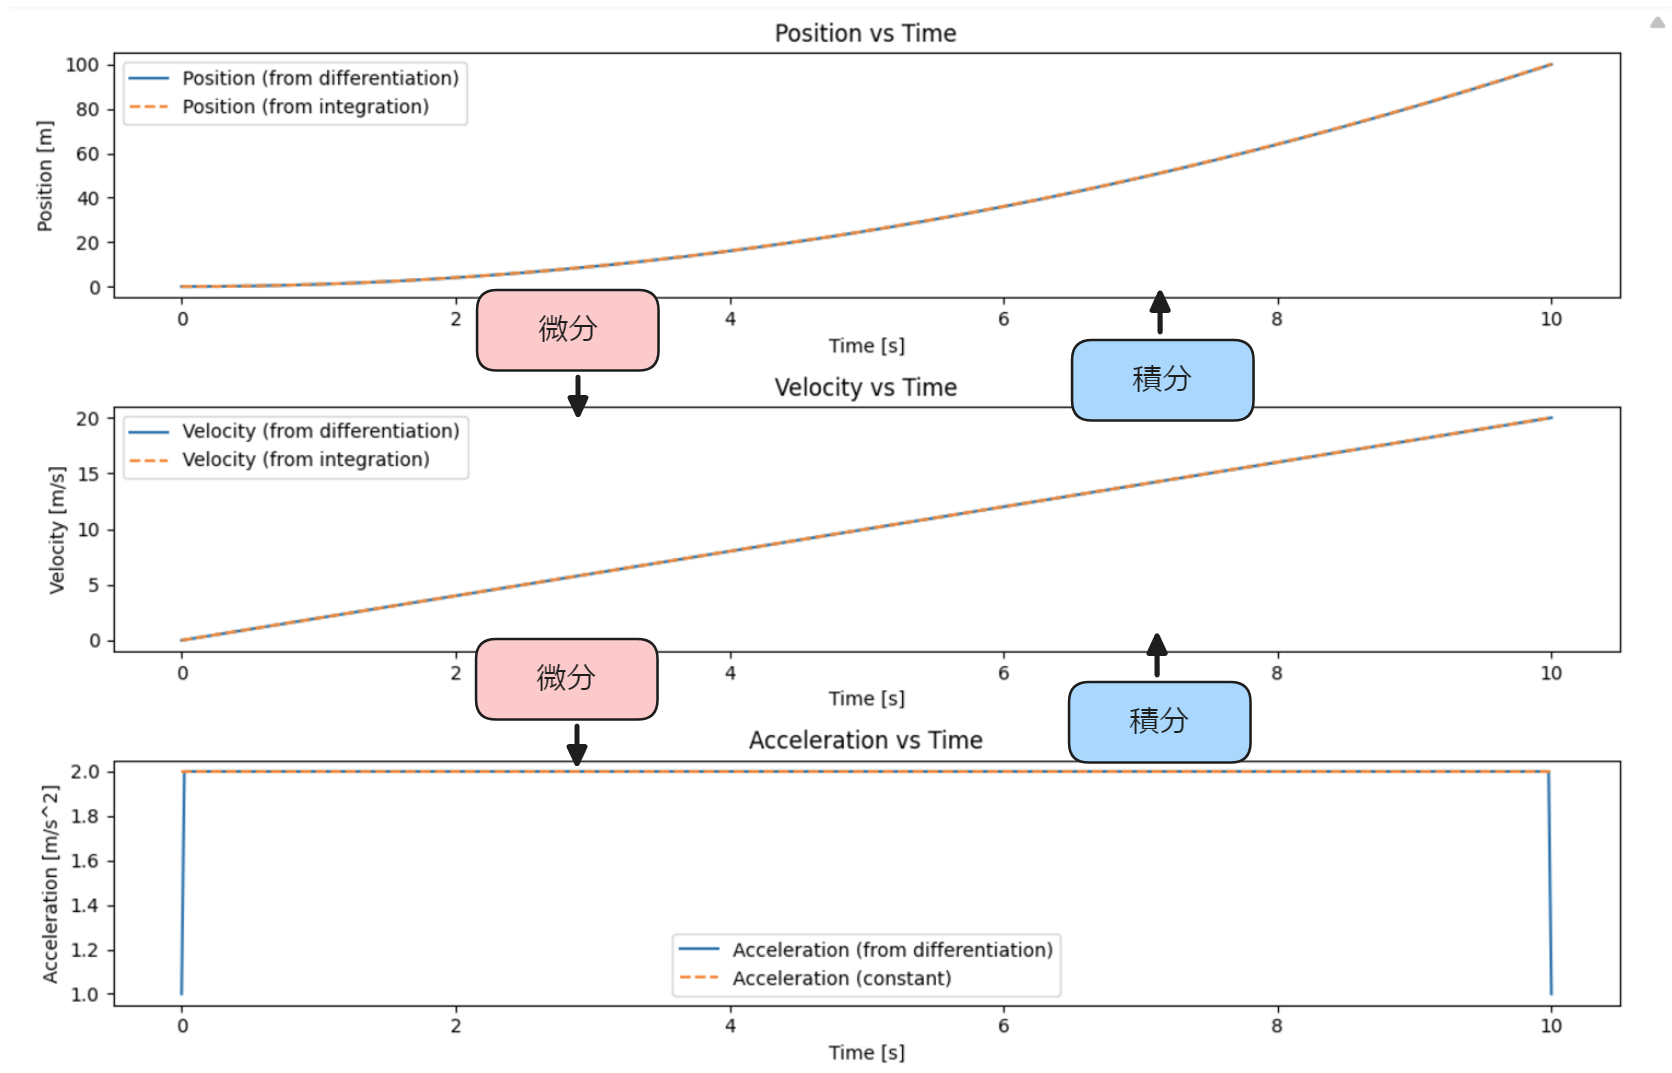

つまり、微分と積分は変換の方向が逆なだけなのです。

位置 → **微分** → 速さ → **微分** → 加速度

位置 ← **積分** ← 速さ ← **積分** ← 加速度 

# 微分の変換の流れを見てみよう

微分するということは、微分する関数のそれぞれの点での瞬間の傾きをプロットした関数に変換することなので、変換する関数のグラフの傾きの値が、変換されたグラフのy軸の値としてプロットされるはずです。

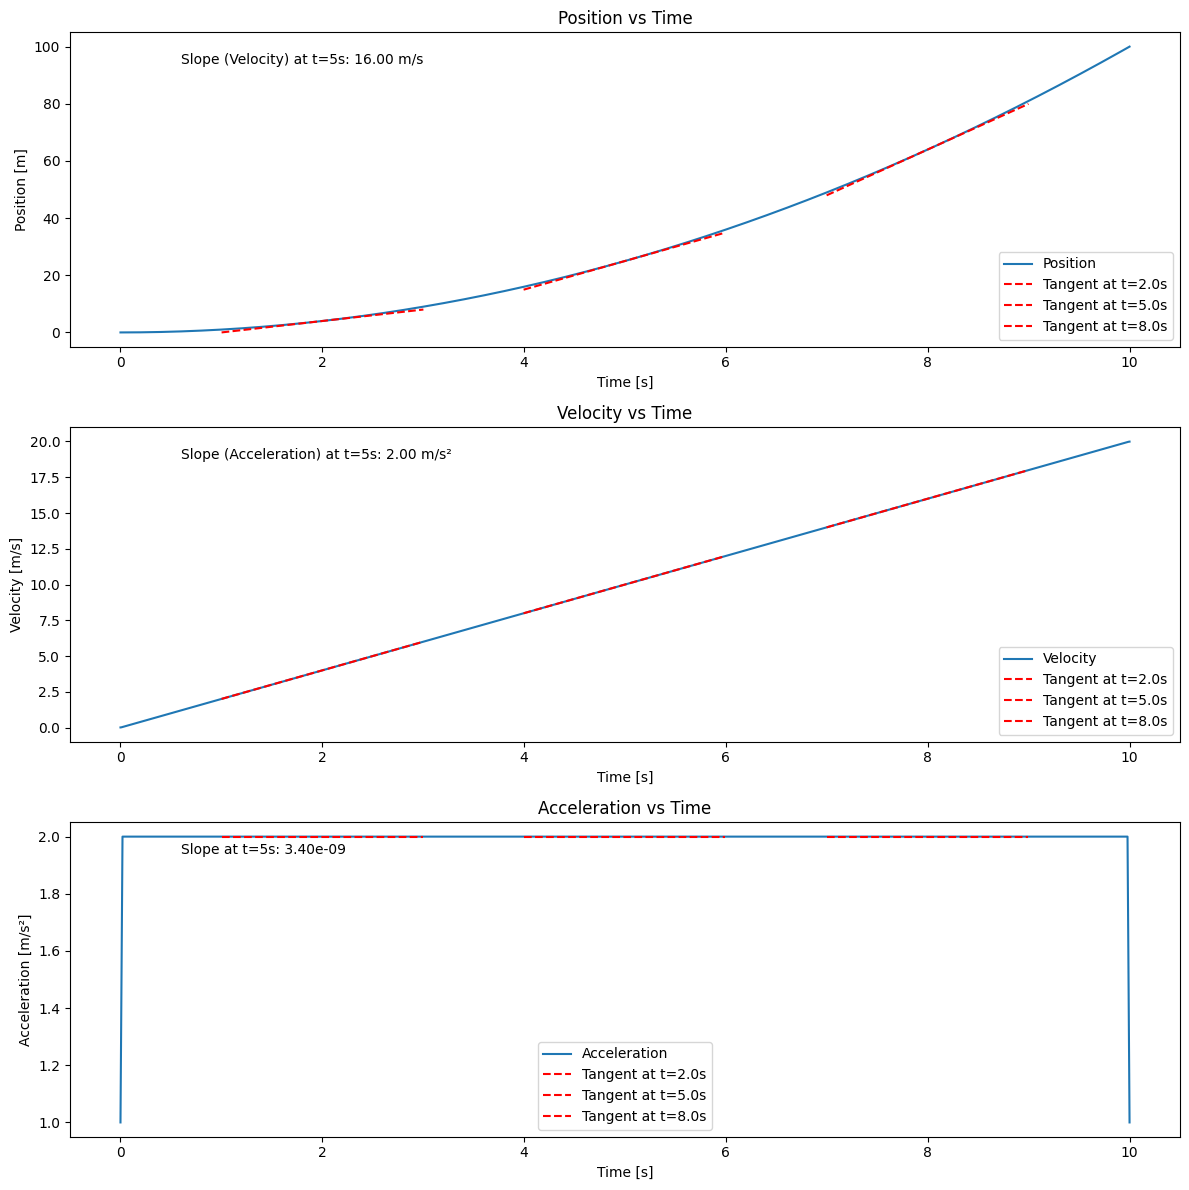

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 時間配列の定義
t = np.linspace(0, 10, 1000)  # 0秒から10秒までの時間
dt = t[1] - t[0]  # 時間ステップ

# 加速度の定義（一定値）
a_const = 2  # 加速度 [m/s^2]

# 位置の関数（抽象化された形）
def position(t):
    return 0.5 * a_const * t**2  # s(t) = 0.5 * a * t^2

# 微分の関数（一般化）
def differentiate(f, t):
    df_dt = np.gradient(f, t)
    return df_dt

# 接線を描く関数
def draw_tangent(ax, x, y, x_point):
    # 接線を引く点のインデックスを取得
    idx = (np.abs(x - x_point)).argmin()
    x0 = x[idx]
    y0 = y[idx]
    # 傾きを計算
    slope = differentiate(y, x)[idx]
    # 接線の範囲を設定
    x_tangent = np.linspace(x0 - 1, x0 + 1, 100)
    y_tangent = slope * (x_tangent - x0) + y0
    # 接線をプロット
    ax.plot(x_tangent, y_tangent, 'r--', label=f'Tangent at t={x0:.1f}s')
    return slope

# 位置の計算
s = position(t)

# 速度と加速度の微分による計算
v = differentiate(s, t)  # 速度 v(t) = ds/dt
a = differentiate(v, t)  # 加速度 a(t) = dv/dt

# グラフのプロット
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# 位置のグラフ
ax = axes[0]
ax.plot(t, s, label='Position')
# 接線を描く（例としてt=5秒で）
slope_s = draw_tangent(ax, t, s, 2)
slope_s = draw_tangent(ax, t, s, 5)
slope_s = draw_tangent(ax, t, s, 8)
ax.set_title('Position vs Time')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]')
ax.legend()
ax.text(0.1, 0.9, f'Slope (Velocity) at t=5s: {slope_s:.2f} m/s', transform=ax.transAxes)

# 速度のグラフ
ax = axes[1]
ax.plot(t, v, label='Velocity')
# 接線を描く（例としてt=5秒で）
slope_v = draw_tangent(ax, t, v, 2)
slope_v = draw_tangent(ax, t, v, 5)
slope_v = draw_tangent(ax, t, v, 8)
ax.set_title('Velocity vs Time')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.legend()
ax.text(0.1, 0.9, f'Slope (Acceleration) at t=5s: {slope_v:.2f} m/s²', transform=ax.transAxes)

# 加速度のグラフ
ax = axes[2]
ax.plot(t, a, label='Acceleration')
# 接線を描く（加速度は一定なので任意の点で同じ）
slope_a = draw_tangent(ax, t, a, 2)
slope_a = draw_tangent(ax, t, a, 5)
slope_a = draw_tangent(ax, t, a, 8)
ax.set_title('Acceleration vs Time')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Acceleration [m/s²]')
ax.legend()
ax.text(0.1, 0.9, f'Slope at t=5s: {slope_a:.2e}', transform=ax.transAxes)

plt.tight_layout()
plt.show()


まず、上の３つのグラフのうち、上段の「位置のグラフ」から中段の「速さのグラフ」への微分を見てみましょう。

位置のグラフのx軸（時間軸）上の5の時を例にします。この時刻で微分を使ってうまい具合に（接線）を引いています。この接線は右上がりの直線であり、１秒につき9.99メートル増えます(9.99 m/s)。これが、中段の速さのグラフでは、x軸が5の時のy軸の値が9.99になるような直線上の点として描かれています。

そして「速さのグラフ」からさらに「加速度のグラフ」への変換でも、微分によって速さのグラフの$x=5$の時の傾きが２だとわかります。特にこの場合はどの時刻でも２です。なぜなら「増え方」は一定だからです（お小遣いが毎月100ドルなら貯金の増え方は一定なのと同じ）。

y軸の値が一定なので下段の「加速度のグラフ」では増えも減りもしない、水平の直線として描かれています。

# 積分の変換の流れを見てみよう

積分は微分の逆なので、下段のグラフから中段、そして上段のグラフへと変換されていくはずです。
下の３つのグラフでは下から上に向かって行くイメージです。

積分するとは平たく言うと「面積を計算する」ことでひとつ上の物理量の増加量を知るツールのことです。

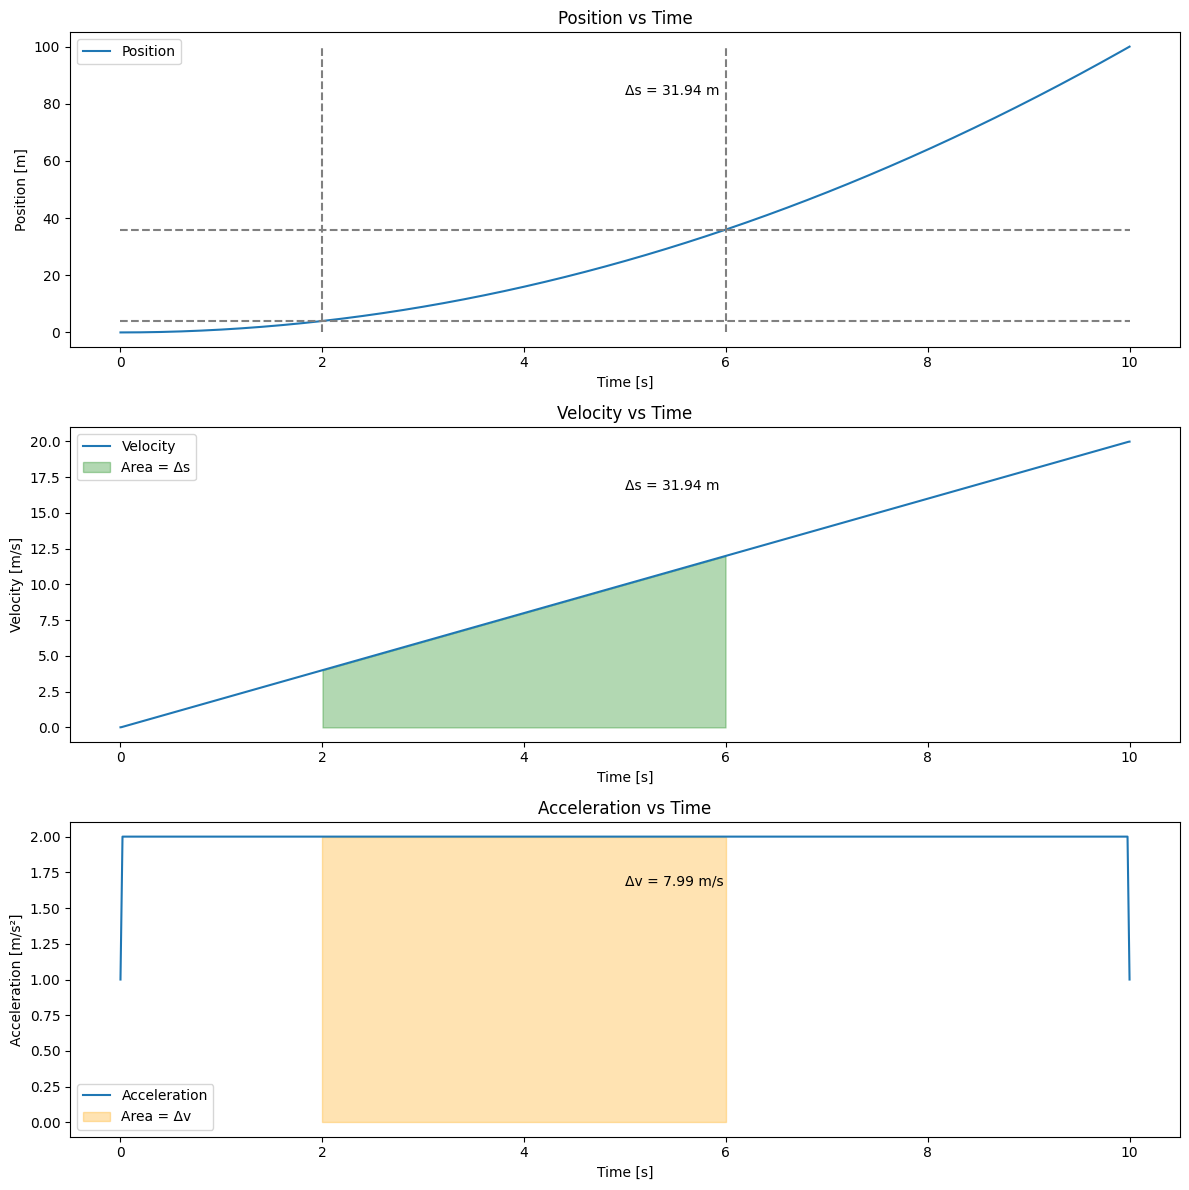

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 時間配列の定義
t = np.linspace(0, 10, 1000)  # 0秒から10秒までの時間
dt = t[1] - t[0]  # 時間ステップ

# 加速度の定義（一定値）
a_const = 2  # 加速度 [m/s^2]

# 位置の関数（抽象化された形）
def position(t):
    return 0.5 * a_const * t**2  # s(t) = 0.5 * a * t^2

# 微分の関数（一般化）
def differentiate(f, t):
    df_dt = np.gradient(f, t)
    return df_dt

# 積分の関数（一般化）
def integrate(f, t, initial=0):
    dt = t[1] - t[0]
    F = np.cumsum(f) * dt + initial
    return F

# 位置の計算
s = position(t)

# 速度と加速度の微分による計算
v = differentiate(s, t)  # 速度 v(t) = ds/dt
a = differentiate(v, t)  # 加速度 a(t) = dv/dt

# 積分による速度と位置の計算
v_int = integrate(a, t, initial=0)  # 初期速度 v(0) = 0
s_int = integrate(v_int, t, initial=0)  # 初期位置 s(0) = 0

# グラフのプロット
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# 面積を計算するための時間範囲
t_start = 2
t_end = 6
mask = (t >= t_start) & (t <= t_end)

# 加速度のグラフ
ax = axes[2]
ax.plot(t, a, label='Acceleration')
# 積分（面積）の可視化
ax.fill_between(t[mask], 0, a[mask], color='orange', alpha=0.3, label='Area = Δv')
ax.set_title('Acceleration vs Time')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Acceleration [m/s²]')
ax.legend()

# 面積（加速度の積分）を計算
delta_v = np.trapezoid(a[mask], t[mask])

ax.text(0.5, 0.8, f'Δv = {delta_v:.2f} m/s', transform=ax.transAxes)

# 速度のグラフ
ax = axes[1]
ax.plot(t, v, label='Velocity')
# 積分（面積）の可視化
ax.fill_between(t[mask], 0, v[mask], color='green', alpha=0.3, label='Area = Δs')
ax.set_title('Velocity vs Time')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.legend()

# 面積（速度の積分）を計算
delta_s = np.trapezoid(v[mask], t[mask])

ax.text(0.5, 0.8, f'Δs = {delta_s:.2f} m', transform=ax.transAxes)

# 位置のグラフ
ax = axes[0]
ax.plot(t, s, label='Position')

# 位置の変化を示すための線を描画
# t_start と t_end に最も近いインデックスを取得
idx_start = np.argmin(np.abs(t - t_start))
idx_end = np.argmin(np.abs(t - t_end))

# t_start と t_end での位置を取得
s_start = s[idx_start]
s_end = s[idx_end]

# 垂直線を描画
ax.vlines([t_start, t_end], s.min(), s.max(), colors='gray', linestyles='dashed')
# 水平線を描画
ax.hlines([s_start, s_end], t.min(), t.max(), colors='gray', linestyles='dashed')

ax.set_title('Position vs Time')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]')
ax.legend()

# 位置の変化量を計算
delta_s_position = s_end - s_start

ax.text(0.5, 0.8, f'Δs = {delta_s_position:.2f} m', transform=ax.transAxes)

plt.tight_layout()
plt.show()


まずは下段の加速度のグラフに着目します。このグラフでは黄色いエリアの面積が「その時間内での増加量」になります。つまり、黄色いエリアの面積（7.99 m/s）分だけ、「速度」が２秒の時点から６秒に時点で増えたことを表します。おもちゃの自動車が、２秒の時点でも動いていたので速度があったわけですが、この加速度をキープした状態では６秒になった時点でさらに速度が上がって（増えて）いたのです。ではどのぐらい増えたのか？という問いに積分が使えるわけです。（速度のグラフのx=2の時のｙの値とx=6の時のｙの値を比べると増加分が分かります。）

では中段の「速度のグラフ」で「ある時間区間でどのぐらい進んだか（距離が増えたか、位置が変わったか）」を知るのに積分が使えます。積分は面積を計算することです。計算する面積は、その時間区間（この場合２～６）での右上がりの直線とⅹ軸とで囲まれるエリアの面積を計算すると31.94 になります。これはその区間で「31.94メートル進んだ」ことになるのです。この増加分は上段のグラフでの点線の補助線で示されています。



# 微分と積分をまとめて統一的にイメージする

微分の説明に使った３つグラフを左列に、積分の説明に使った３つのグラフを右列において、並べてみました。

微分は左列を上から下に、積分は右列を下から上に読みます。

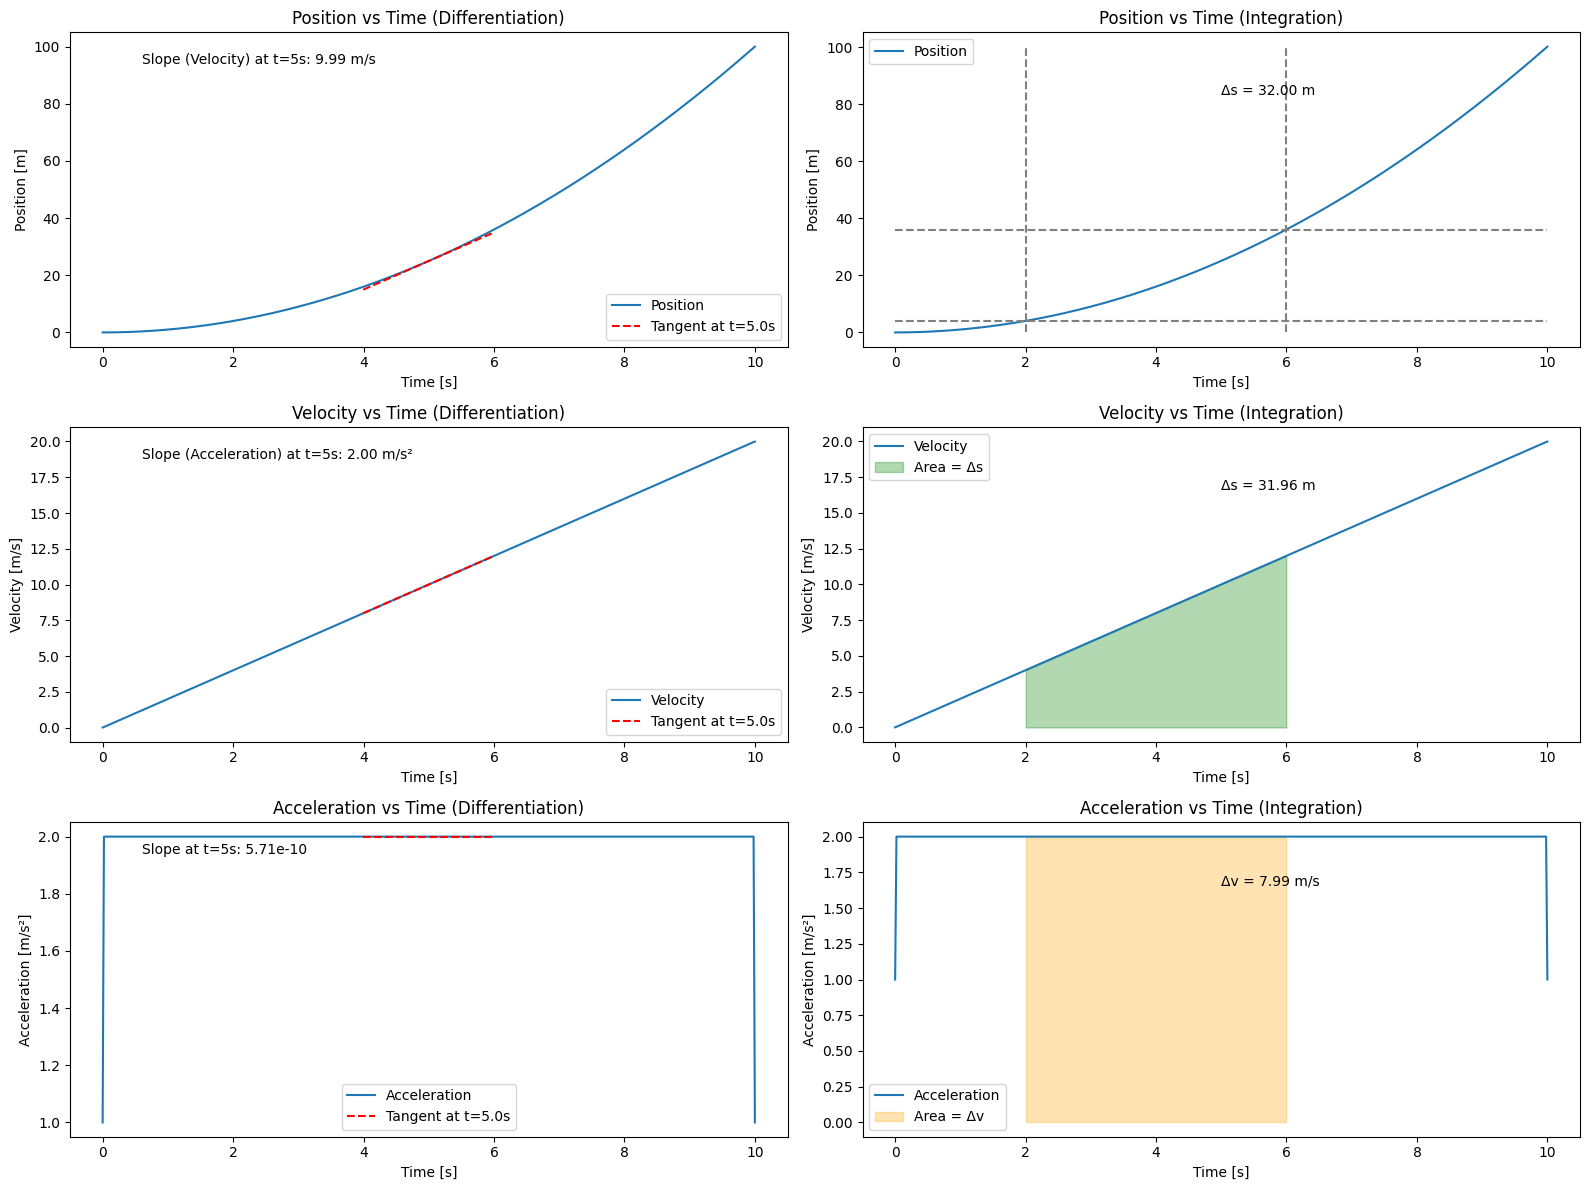

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 時間配列の定義
t = np.linspace(0, 10, 1000)  # 0秒から10秒までの時間
dt = t[1] - t[0]  # 時間ステップ

# 加速度の定義（一定値）
a_const = 2  # 加速度 [m/s^2]

# 位置の関数（抽象化された形）
def position(t):
    return 0.5 * a_const * t**2  # s(t) = 0.5 * a * t^2

# 微分の関数（一般化）
def differentiate(f, t):
    df_dt = np.gradient(f, t)
    return df_dt

# 積分の関数（一般化）
def integrate(f, t, initial=0):
    dt = t[1] - t[0]
    F = np.cumsum(f) * dt + initial
    return F

# 接線を描く関数
def draw_tangent(ax, x, y, x_point):
    # 接線を引く点のインデックスを取得
    idx = (np.abs(x - x_point)).argmin()
    x0 = x[idx]
    y0 = y[idx]
    # 傾きを計算
    slope = differentiate(y, x)[idx]
    # 接線の範囲を設定
    x_tangent = np.linspace(x0 - 1, x0 + 1, 100)
    y_tangent = slope * (x_tangent - x0) + y0
    # 接線をプロット
    ax.plot(x_tangent, y_tangent, 'r--', label=f'Tangent at t={x0:.1f}s')
    return slope

# 位置の計算
s = position(t)

# 速度と加速度の微分による計算
v = differentiate(s, t)  # 速度 v(t) = ds/dt
a = differentiate(v, t)  # 加速度 a(t) = dv/dt

# 積分による速度と位置の計算
v_int = integrate(a, t, initial=0)  # 初期速度 v(0) = 0
s_int = integrate(v_int, t, initial=0)  # 初期位置 s(0) = 0

# 面積を計算するための時間範囲
t_start = 2
t_end = 6
mask = (t >= t_start) & (t <= t_end)

# グラフのプロット
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

### 微分のグラフ（左側）

# 位置のグラフ（微分）
ax = axes[0, 0]
ax.plot(t, s, label='Position')
# 接線を描く（例としてt=5秒で）
slope_s = draw_tangent(ax, t, s, 5)
ax.set_title('Position vs Time (Differentiation)')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]')
ax.legend()
ax.text(0.1, 0.9, f'Slope (Velocity) at t=5s: {slope_s:.2f} m/s', transform=ax.transAxes)

# 速度のグラフ（微分）
ax = axes[1, 0]
ax.plot(t, v, label='Velocity')
# 接線を描く（例としてt=5秒で）
slope_v = draw_tangent(ax, t, v, 5)
ax.set_title('Velocity vs Time (Differentiation)')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.legend()
ax.text(0.1, 0.9, f'Slope (Acceleration) at t=5s: {slope_v:.2f} m/s²', transform=ax.transAxes)

# 加速度のグラフ（微分）
ax = axes[2, 0]
ax.plot(t, a, label='Acceleration')
# 接線を描く（加速度は一定なので任意の点で同じ）
slope_a = draw_tangent(ax, t, a, 5)
ax.set_title('Acceleration vs Time (Differentiation)')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Acceleration [m/s²]')
ax.legend()
ax.text(0.1, 0.9, f'Slope at t=5s: {slope_a:.2e}', transform=ax.transAxes)

### 積分のグラフ（右側）

# 加速度のグラフ（積分）
ax = axes[2, 1]
ax.plot(t, a, label='Acceleration')
# 面積の可視化
ax.fill_between(t[mask], 0, a[mask], color='orange', alpha=0.3, label='Area = Δv')
ax.set_title('Acceleration vs Time (Integration)')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Acceleration [m/s²]')
ax.legend()
# 面積（加速度の積分）を計算
delta_v = np.trapezoid(a[mask], t[mask])
ax.text(0.5, 0.8, f'Δv = {delta_v:.2f} m/s', transform=ax.transAxes)

# 速度のグラフ（積分）
ax = axes[1, 1]
ax.plot(t, v_int, label='Velocity')
# 面積の可視化
ax.fill_between(t[mask], 0, v_int[mask], color='green', alpha=0.3, label='Area = Δs')
ax.set_title('Velocity vs Time (Integration)')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
ax.legend()
# 面積（速度の積分）を計算
delta_s_int = np.trapezoid(v_int[mask], t[mask])
ax.text(0.5, 0.8, f'Δs = {delta_s_int:.2f} m', transform=ax.transAxes)

# 位置のグラフ（積分）
ax = axes[0, 1]
ax.plot(t, s_int, label='Position')
# 位置の変化を示すための線を描画
idx_start = np.argmin(np.abs(t - t_start))
idx_end = np.argmin(np.abs(t - t_end))
s_start = s_int[idx_start]
s_end = s_int[idx_end]
# 垂直線を描画
ax.vlines([t_start, t_end], s_int.min(), s_int.max(), colors='gray', linestyles='dashed')
# 水平線を描画
ax.hlines([s_start, s_end], t.min(), t.max(), colors='gray', linestyles='dashed')
ax.set_title('Position vs Time (Integration)')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]')
ax.legend()
# 位置の変化量を計算
delta_s_position_int = s_end - s_start
ax.text(0.5, 0.8, f'Δs = {delta_s_position_int:.2f} m', transform=ax.transAxes)

plt.tight_layout()
plt.show()


与えられた関数から微分と積分を使って何が得られるかをまとめたのが下の図です。

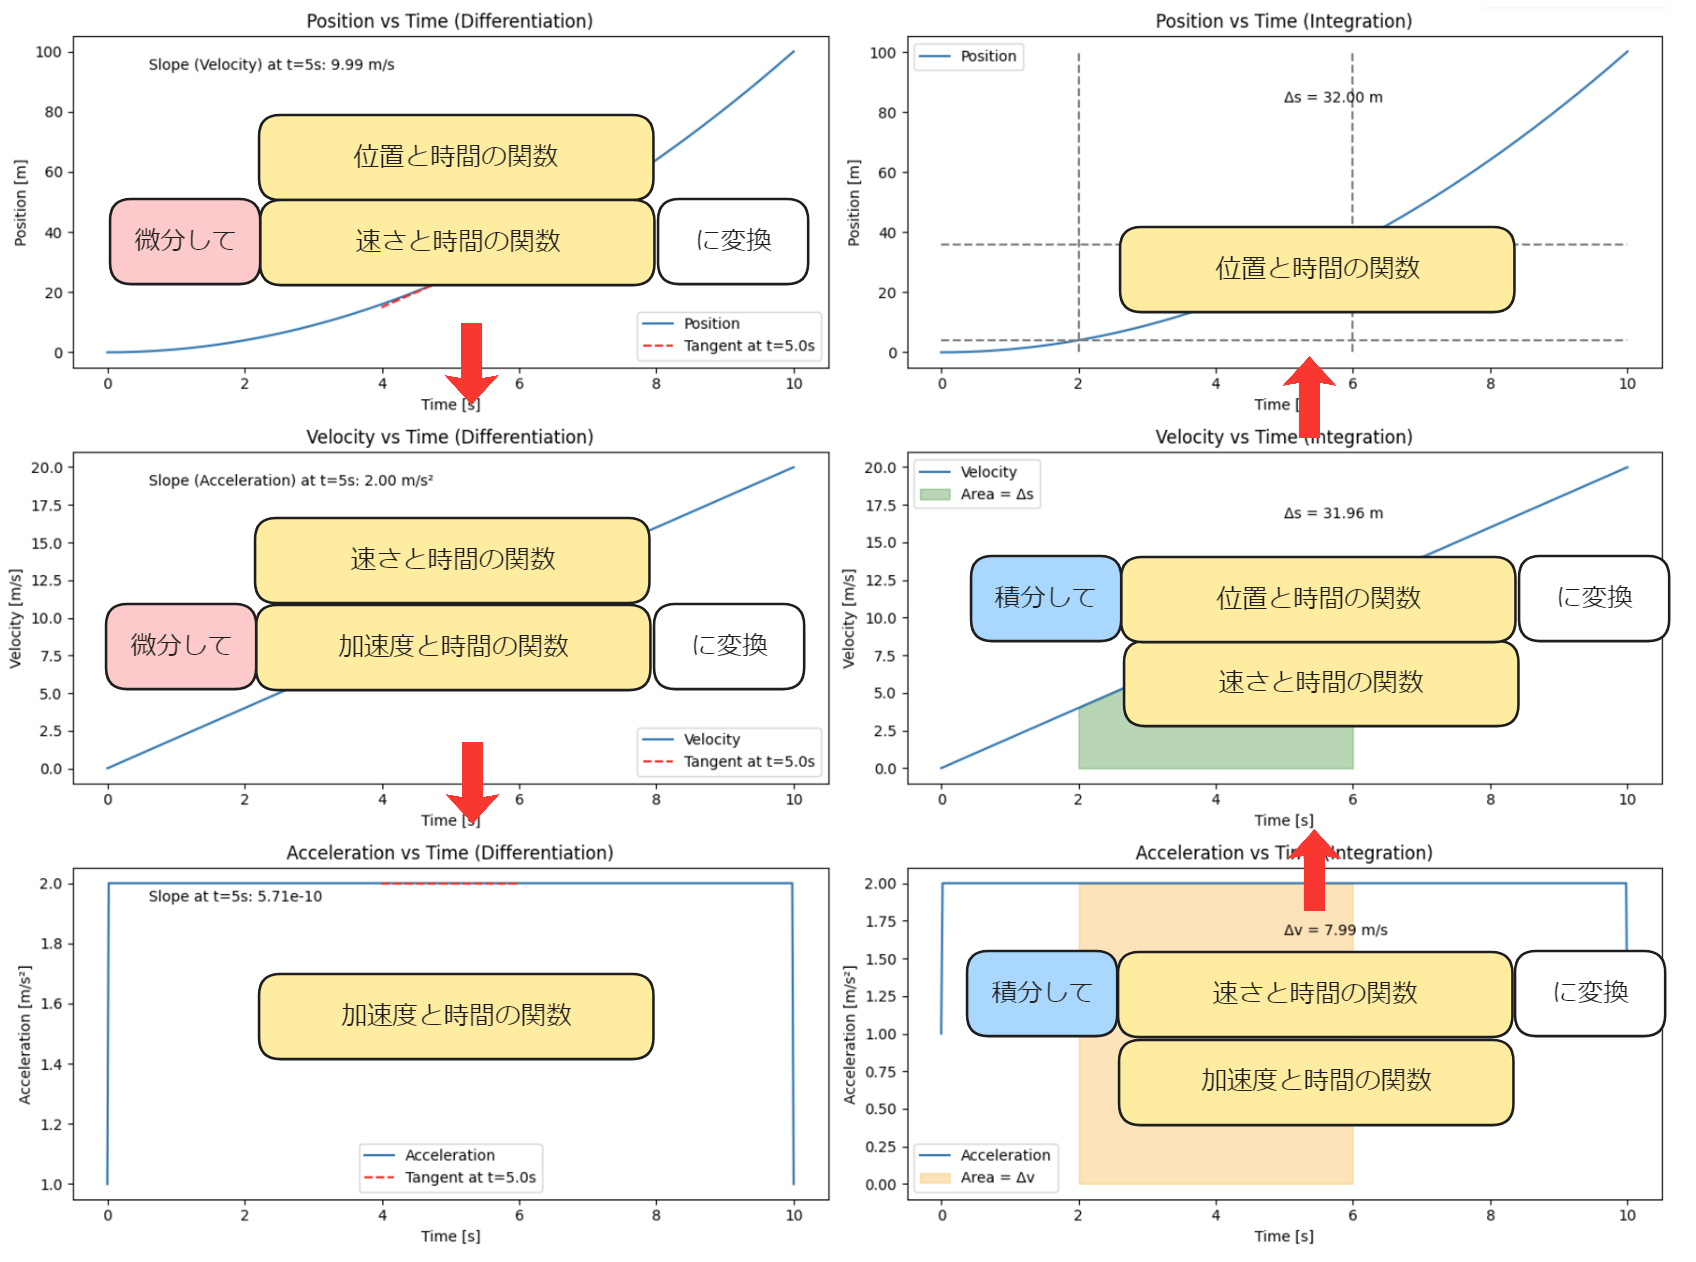

# 微分と積分は次数を跨ぐ操作

もうひとつの微分・積分の捉え方として「次数」に着目する方法があります。

- 微分は「ある時点」に着目するので「連続した時点の集まり」の情報の分、ひとつ次元が減り、ひとつ下の段に降りてきます。
- 積分は「連続した時点の集まり」の「ある区画」に着目するので、その分の次元が増え、ひとつ上の段に登ります。

自分にとっては、多項式関数である一次関数や二次関数などをいままで別々に扱っていたところ、急にそれらの多項式を「跨って」扱うことが出来る微分・積分は、やや理解が難解でしたが、統一して考えると分かりやすいですね。

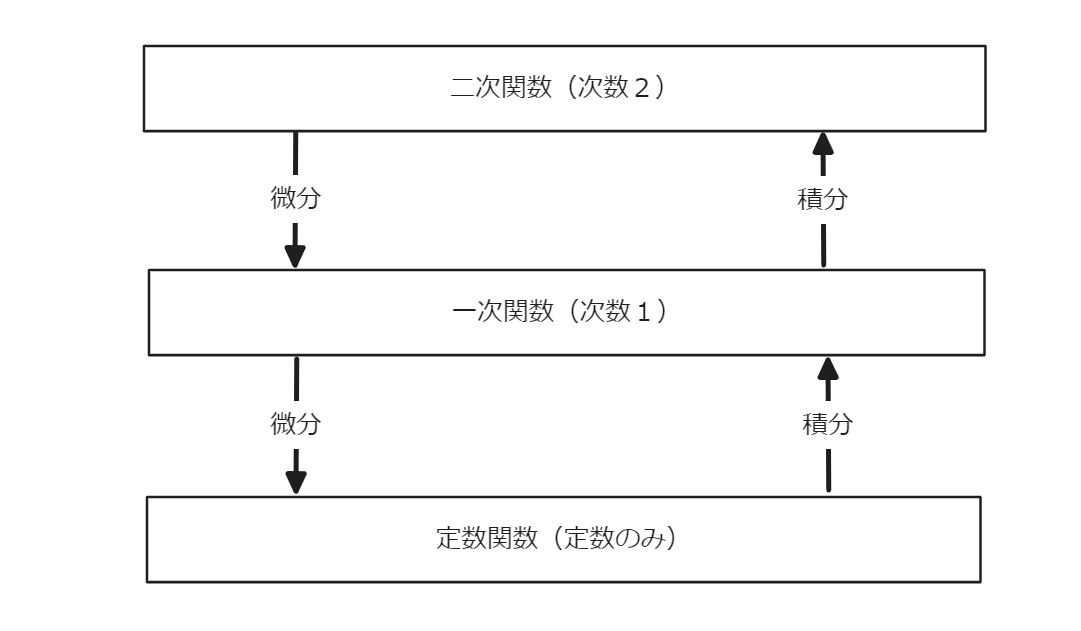